# Importing Packages

In [ ]:
!pip install category_encoders

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

import calendar
import warnings     ##imports warning ignore for superficial warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# read the data

In [50]:
wp = pd.read_csv('TrainingSetValues.csv') #read in the main data set
ps = pd.read_csv('TrainingSetLabels.csv') #reads in the secondary dataset

In [51]:
wp.head() #Check the head of training Values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [52]:
ps.head() #Check the head of training labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


## Combining the data and printing new data set

In [82]:
wps = pd.merge(wp, ps) # merge data sets training labels and values

In [54]:
wps.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [55]:
wps.info() # checking data set info to ensure good merge and evaluate null count and data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

# shape and data types of the data

In [56]:
print(wps.shape)
print(wps.dtypes)

(59400, 41)
id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   objec

# select numeric columns

In [57]:
wps_numeric = wps.select_dtypes(include=[np.number])
numeric_cols = wps_numeric.columns.values
print(numeric_cols)

['id' 'amount_tsh' 'gps_height' 'longitude' 'latitude' 'num_private'
 'region_code' 'district_code' 'population' 'construction_year']


# select non-numeric columns

In [58]:
wps_non_numeric = wps.select_dtypes(exclude=[np.number])
non_numeric_cols = wps_non_numeric.columns.values
print(non_numeric_cols)

['date_recorded' 'funder' 'installer' 'wpt_name' 'basin' 'subvillage'
 'region' 'lga' 'ward' 'public_meeting' 'recorded_by' 'scheme_management'
 'scheme_name' 'permit' 'extraction_type' 'extraction_type_group'
 'extraction_type_class' 'management' 'management_group' 'payment'
 'payment_type' 'water_quality' 'quality_group' 'quantity'
 'quantity_group' 'source' 'source_type' 'source_class' 'waterpoint_type'
 'waterpoint_type_group' 'status_group']


<AxesSubplot:>

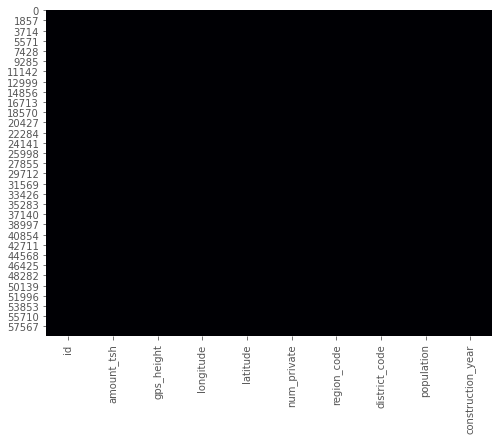

In [59]:
plt.figure(figsize = (8,6))                                      
sns.heatmap(wps_numeric.isnull(), cbar=False , cmap = 'magma') #Checking for nulls within numeric-based cols

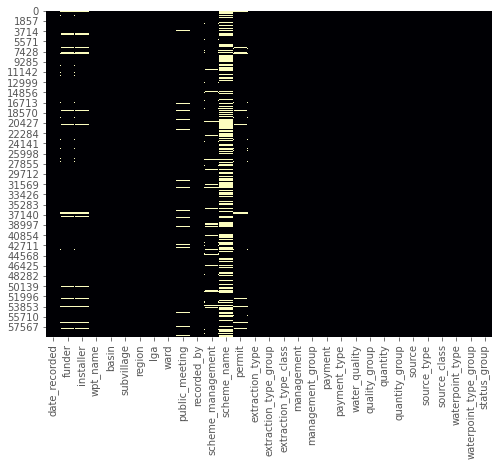

In [60]:
plt.figure(figsize = (8,6))                                      
z = sns.heatmap(wps_non_numeric.isnull(), cbar=False , cmap = 'magma') #Checking for nulls within numeric-based cols

In [61]:
z.get_figure().savefig('C:\\Users\\845515\\OneDrive - BOOZ ALLEN HAMILTON\\Work\\Challenges\\missing data')

In [62]:
list(wps.columns.values)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

# Correcting Data types

In [96]:
wps['construction_year'] = wps['construction_year'].replace(0, 1959) ## unsure of the correlation of a 0 year to the rest of the data but will relplace the zero with 1959
wps['construction_year'].value_counts(normalize=True)

1959    0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1996    0.013653
1980    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

<AxesSubplot:>

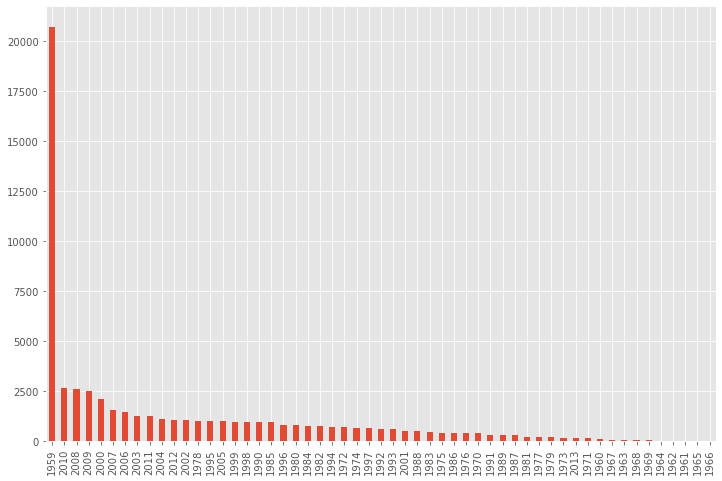

In [64]:
wps['construction_year'].value_counts().plot.bar()

(array([0]), [Text(0, 0, '0')])

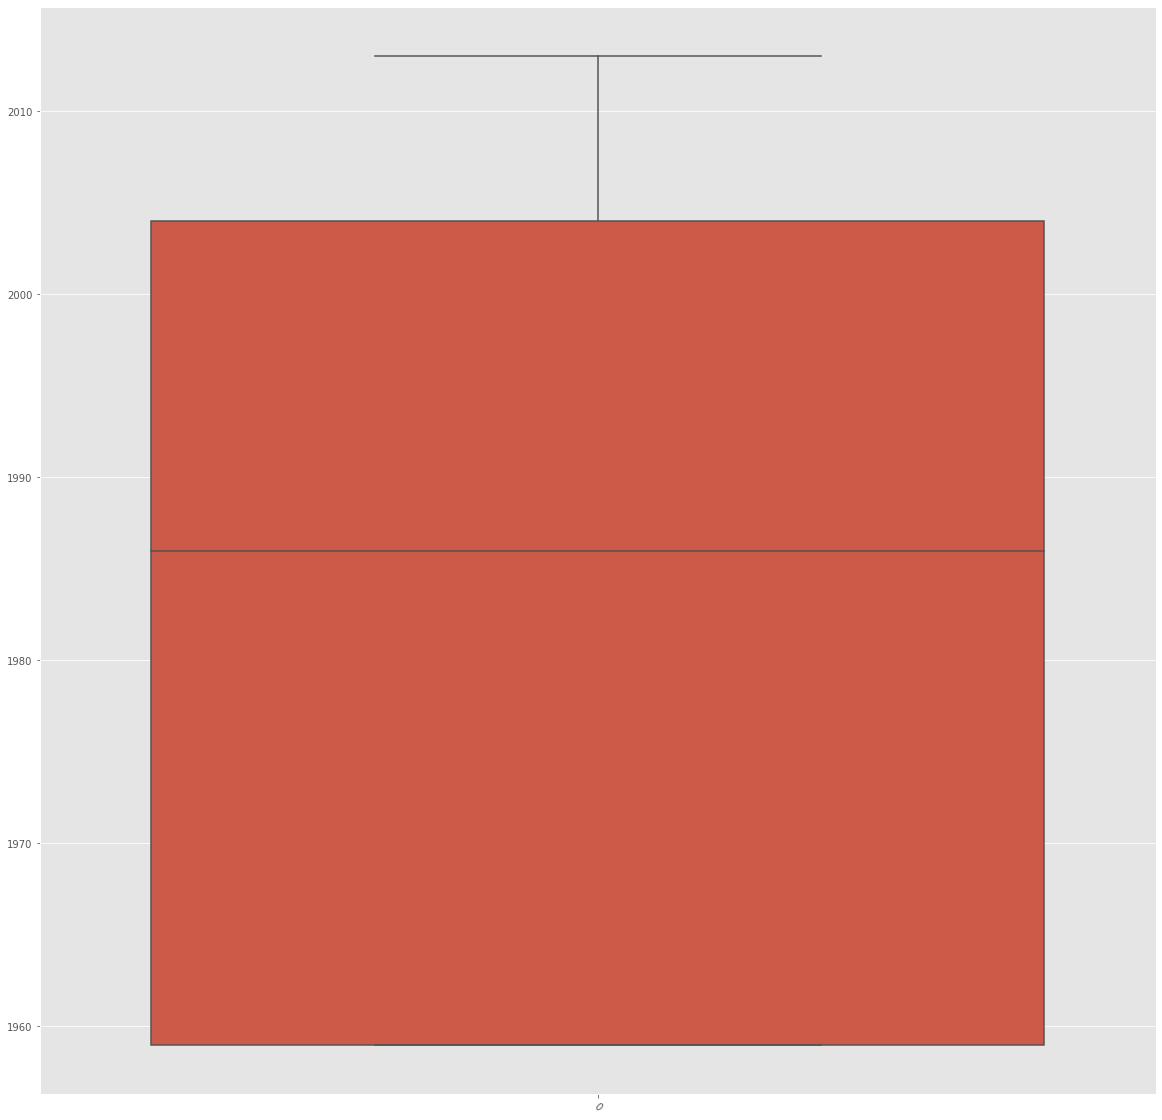

In [65]:
plt.figure(figsize = (20, 20))
sns.boxplot(data=wps.construction_year)
plt.xticks(rotation=-45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

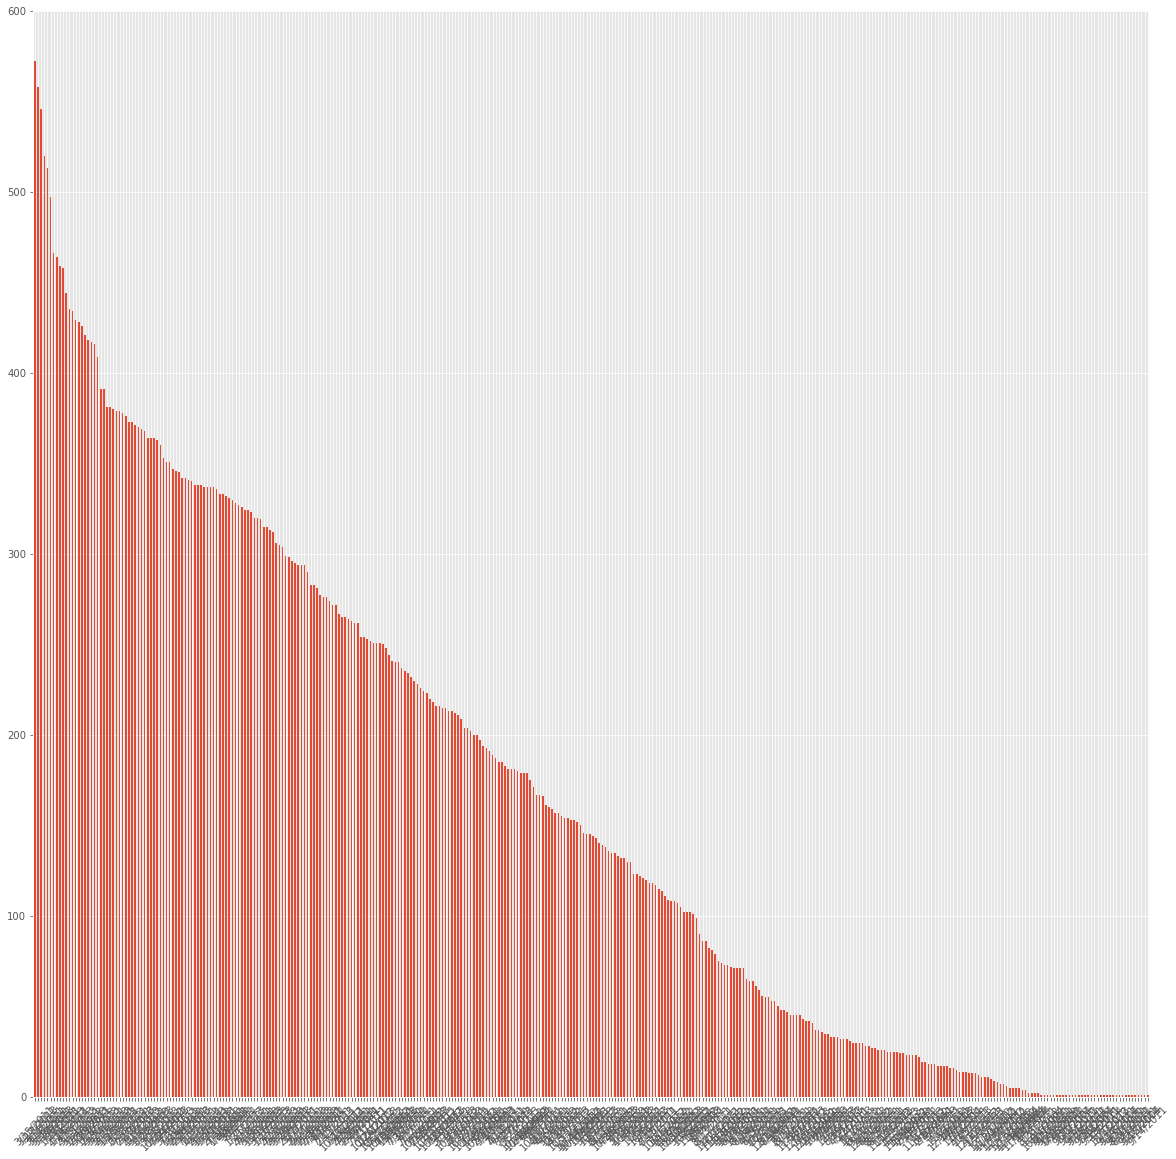

In [66]:
plt.figure(figsize = (20, 20))
wps['date_recorded'].value_counts().plot.bar()
plt.xticks(rotation=45)

#changing into DTG

In [83]:
##wps['construction_year']= pd.to_datetime(wps['construction_year']) ##changes date recorded to data type date (this code changes all values to epoch. possibly because the original value is a day)
wps['date_recorded']= pd.to_datetime(wps['date_recorded'])##changes date recorded to data type date
##wps['construction_year']= wps['construction_year'].dt.year ##changes date recorded to data type date (this code changes all values to epoch)
##wps['date_recorded']= wps['date_recorded'].dt.day.year  ##changes date recorded to data type date
wps.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

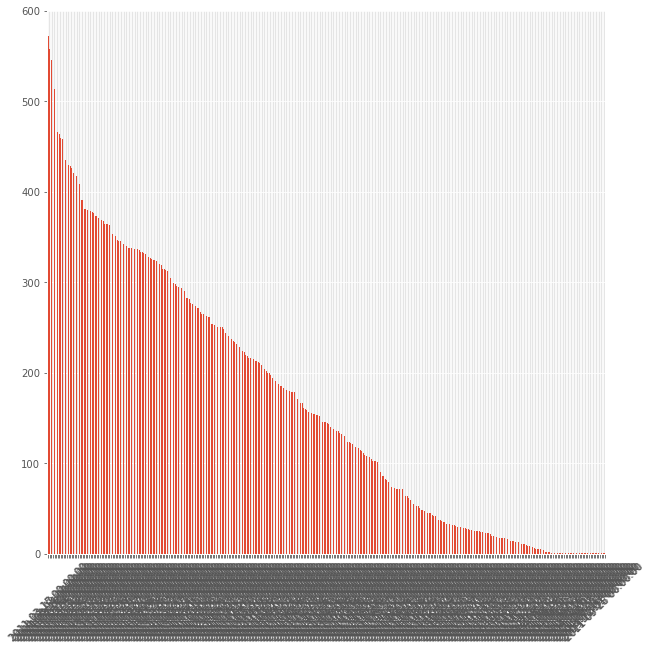

In [84]:
plt.figure(figsize = (10, 10))
wps['date_recorded'].value_counts().plot.bar()
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, '0'),
  Text(1, 0, '2010'),
  Text(2, 0, '2008'),
  Text(3, 0, '2009'),
  Text(4, 0, '2000'),
  Text(5, 0, '2007'),
  Text(6, 0, '2006'),
  Text(7, 0, '2003'),
  Text(8, 0, '2011'),
  Text(9, 0, '2004'),
  Text(10, 0, '2012'),
  Text(11, 0, '2002'),
  Text(12, 0, '1978'),
  Text(13, 0, '1995'),
  Text(14, 0, '2005'),
  Text(15, 0, '1999'),
  Text(16, 0, '1998'),
  Text(17, 0, '1990'),
  Text(18, 0, '1985'),
  Text(19, 0, '1980'),
  Text(20, 0, '1996'),
  Text(21, 0, '1984'),
  Text(22, 0, '1982'),
  Text(23, 0, '1994'),
  Text(24, 0, '1972'),
  Text(25, 0, '1974'),
  Text(26, 0, '1997'),
  Text(27, 0, '1992'),
  Text(28, 0, '1993'),
  Text(29, 0, '2001'),
  Text(30, 0, '1988'),
  Text(31, 0, '1983'),
  Text(32, 0, '1975'),


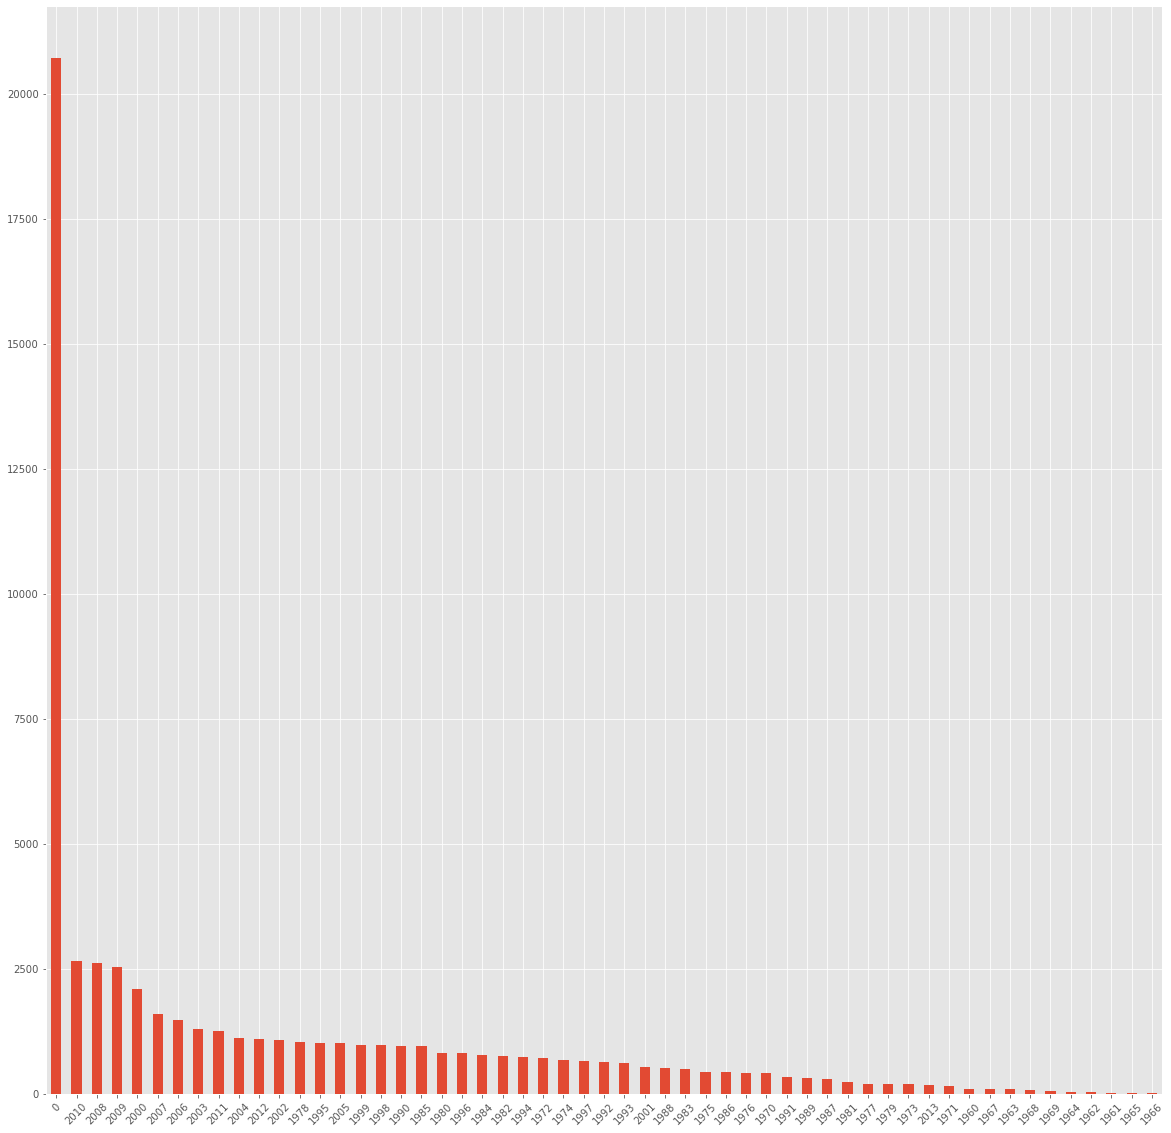

In [85]:
plt.figure(figsize = (20, 20))
wps['construction_year'].value_counts().plot.bar()
plt.xticks(rotation=45)

#Changing into Catagories

In [86]:
wps['water_quality']=pd.Categorical(wps['water_quality']) ##changing Payment to catagorical data
wps['quality_group']=pd.Categorical(wps['quality_group'])##changing Payment to catagorical data

In [87]:
wps['quantity']=pd.Categorical(wps['quantity']) ##changing Payment to catagorical data
wps['quantity_group']=pd.Categorical(wps['quantity_group'])##changing Payment to catagorical data
wps['source']=pd.Categorical(wps['source']) ##changing Payment to catagorical data
wps['source_type']=pd.Categorical(wps['source_type'])##changing Payment to catagorical data
wps['source_class']=pd.Categorical(wps['source_class']) ##changing Payment to catagorical data
wps['status_group']=pd.Categorical(wps['status_group'])##changing Payment to catagorical data
wps['waterpoint_type']=pd.Categorical(wps['waterpoint_type']) ##changing Payment to catagorical data
wps['waterpoint_type_group']=pd.Categorical(wps['waterpoint_type_group']) ##changing Payment to catagorical data

In [88]:
wps['permit']=wps['permit'].astype('bool') ##changing Payment to catagorical data
wps['extraction_type']=pd.Categorical(wps['extraction_type'])##changing Payment to catagorical data
wps['extraction_type_group']=pd.Categorical(wps['extraction_type_group']) ##changing Payment to catagorical data
wps['extraction_type_class']=pd.Categorical(wps['extraction_type_class'])##changing Payment to catagorical data
wps['management']=pd.Categorical(wps['management']) ##changing Payment to catagorical data
wps['management_group']=pd.Categorical(wps['management_group'])##changing Payment to catagorical data
wps['payment_type']=pd.Categorical(wps['payment_type']) ##changing Payment to catagorical data
wps['extraction_type_class']=pd.Categorical(wps['extraction_type_class'])##changing Payment to catagorical data

In [89]:
wps['payment']=pd.Categorical(wps['payment']) ##changing Payment to catagorical data

In [90]:
wps.loc[:,"num_private"]
wps.describe(include='all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400.000000,59400.000000,59400,55765,59400.000000,55745,59400.000000,5.940000e+04,59400,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1897,NaN,2145,NaN,NaN,37400,NaN,...,8,6,5,5,10,7,3,7,6,3
top,NaN,NaN,2011-03-15 00:00:00,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259
first,NaN,NaN,2002-10-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2013-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
wps.duplicated() ##checking for duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
59395    False
59396    False
59397    False
59398    False
59399    False
Length: 59400, dtype: bool

In [92]:
wps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

## Confirming missing data and fixing it

In [93]:
wps.isnull().sum() ##checking for nulled frames and counting

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
colsToDrop = ['id', 'scheme_name', 'scheme_management', 'public_meeting', 'recorded_by'] ##probable unecessary columns

In [ ]:
wpsGeos = ['longitude', 'latitude', 'region', 'lga', 'region_code', 'district_code', 'subvillage'] ##Subset GeoData for later use

In [ ]:
##wps.drop(colsToDrop, axis=1, inplace=True) ## Drop unecessary or unknown value columns

In [ ]:
##wps.drop(wpsGeos, axis=1, inplace=True) ## Drop Geo info for later use

In [ ]:
wps.info()

id - 0%
amount_tsh - 0%
date_recorded - 0%
funder - 6%
gps_height - 0%
installer - 6%
longitude - 0%
latitude - 0%
wpt_name - 0%
num_private - 0%
basin - 0%
subvillage - 1%
region - 0%
region_code - 0%
district_code - 0%
lga - 0%
ward - 0%
population - 0%
public_meeting - 6%
recorded_by - 0%
scheme_management - 7%
scheme_name - 47%
permit - 0%
construction_year - 0%
extraction_type - 0%
extraction_type_group - 0%
extraction_type_class - 0%
management - 0%
management_group - 0%
payment - 0%
payment_type - 0%
water_quality - 0%
quality_group - 0%
quantity - 0%
quantity_group - 0%
source - 0%
source_type - 0%
source_class - 0%
waterpoint_type - 0%
waterpoint_type_group - 0%
status_group - 0%


<AxesSubplot:>

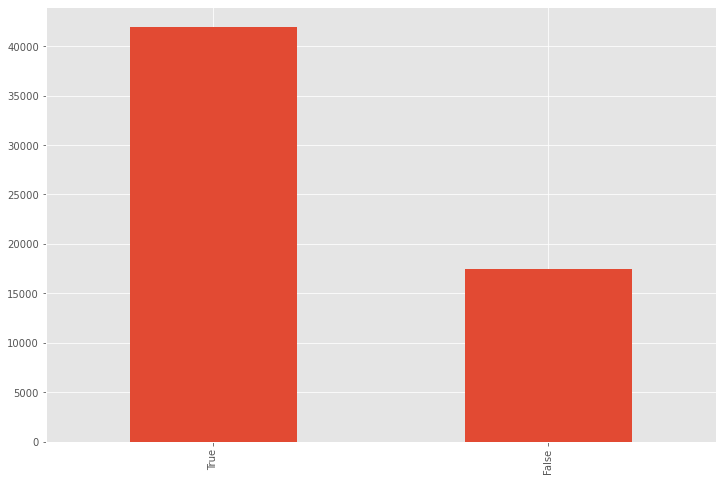

In [94]:
for col in wps.columns:
    pct_missing = np.mean(wps[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
wps['permit'].value_counts().plot.bar()

<AxesSubplot:>

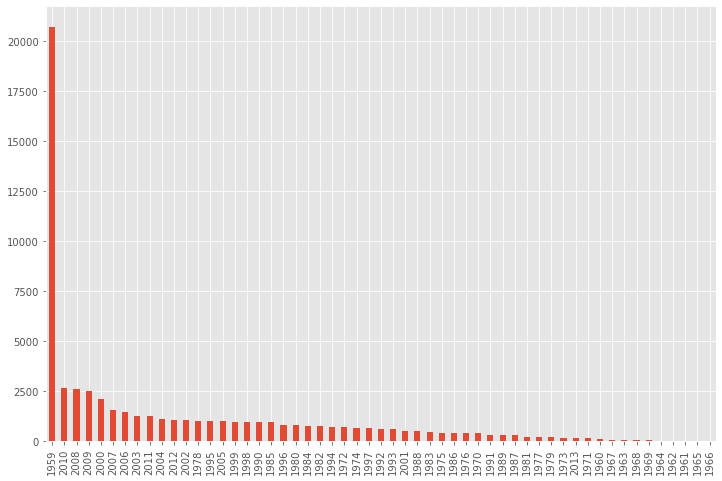

In [97]:
wps['construction_year'].value_counts().plot.bar()

# Data Exploration 

<AxesSubplot:>

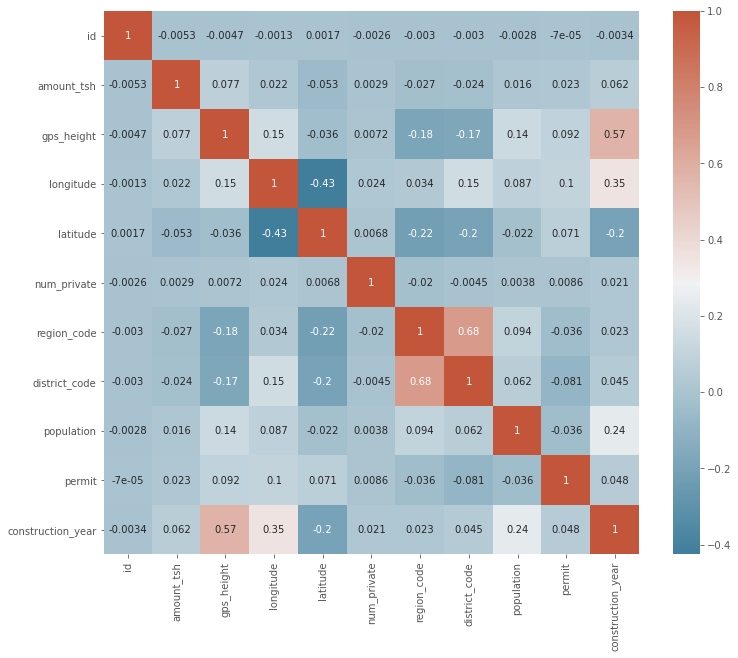

In [98]:
corr = wps.corr()
f, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

In [99]:
wps.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1983.631111
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,20.641015
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,1959.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,1959.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'amount_tsh'),
  Text(2, 0, 'gps_height'),
  Text(3, 0, 'longitude'),
  Text(4, 0, 'latitude'),
  Text(5, 0, 'num_private'),
  Text(6, 0, 'region_code'),
  Text(7, 0, 'district_code'),
  Text(8, 0, 'population'),
  Text(9, 0, 'public_meeting'),
  Text(10, 0, 'permit'),
  Text(11, 0, 'construction_year')])

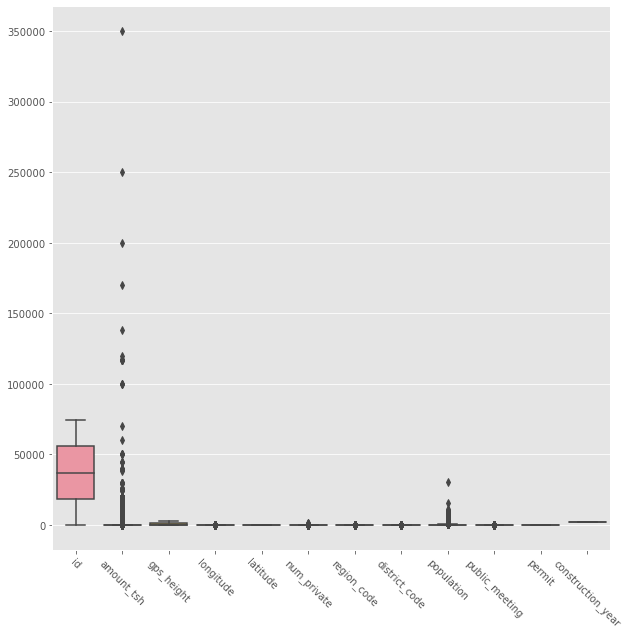

In [100]:
plt.figure(figsize = (10, 10))
sns.boxplot(data=wps)

plt.xticks(rotation=-45)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

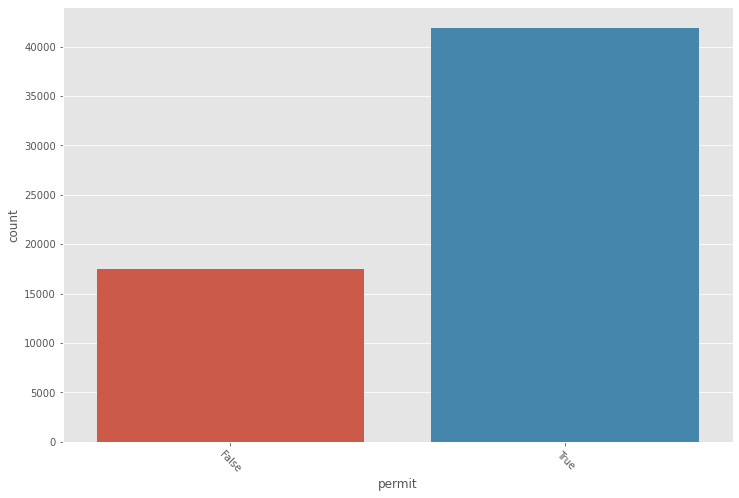

In [101]:
chart = sns.countplot(x= 'permit', data=wps)
plt.xticks(rotation=-45)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'coloured'),
  Text(1, 0, 'fluoride'),
  Text(2, 0, 'fluoride abandoned'),
  Text(3, 0, 'milky'),
  Text(4, 0, 'salty'),
  Text(5, 0, 'salty abandoned'),
  Text(6, 0, 'soft'),
  Text(7, 0, 'unknown')])

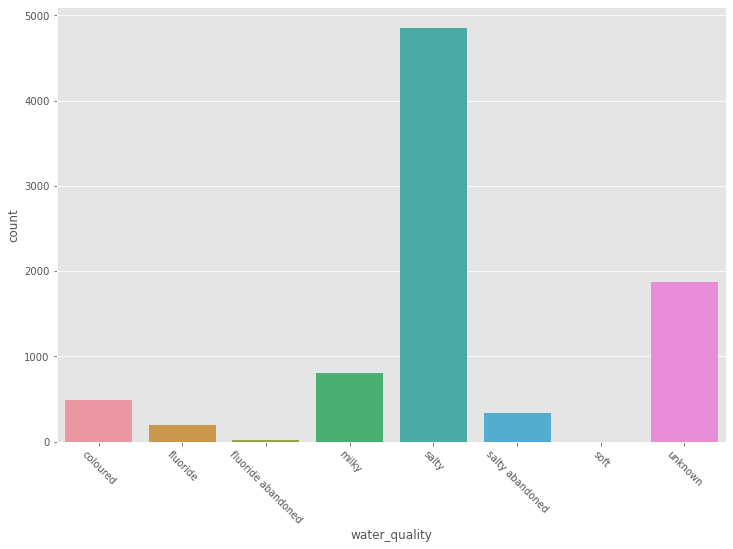

In [102]:
chart = sns.countplot(x= 'water_quality', data=wps[-(wps.water_quality == 'soft')])
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'coloured'),
  Text(1, 0, 'fluoride'),
  Text(2, 0, 'fluoride abandoned'),
  Text(3, 0, 'milky'),
  Text(4, 0, 'salty'),
  Text(5, 0, 'salty abandoned'),
  Text(6, 0, 'soft'),
  Text(7, 0, 'unknown')])

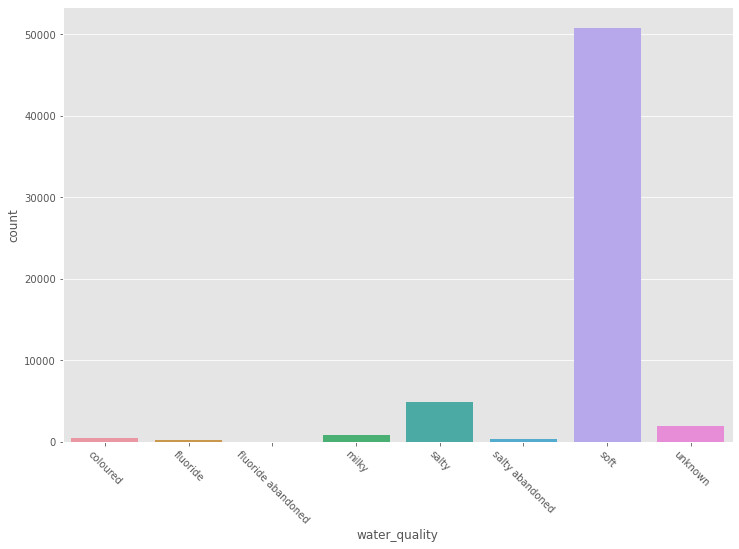

In [140]:
chart = sns.countplot(x= 'water_quality', data=wps)
plt.xticks(rotation=-45)

<AxesSubplot:xlabel='status_group', ylabel='count'>

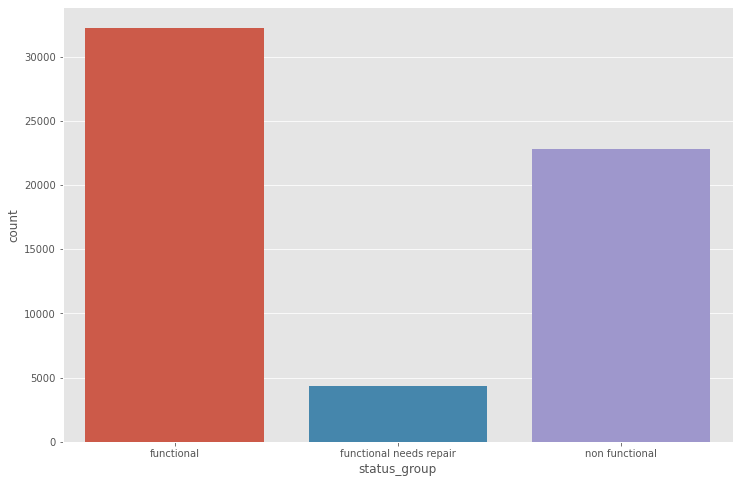

In [164]:
sns.countplot(x= 'status_group', data=wps)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

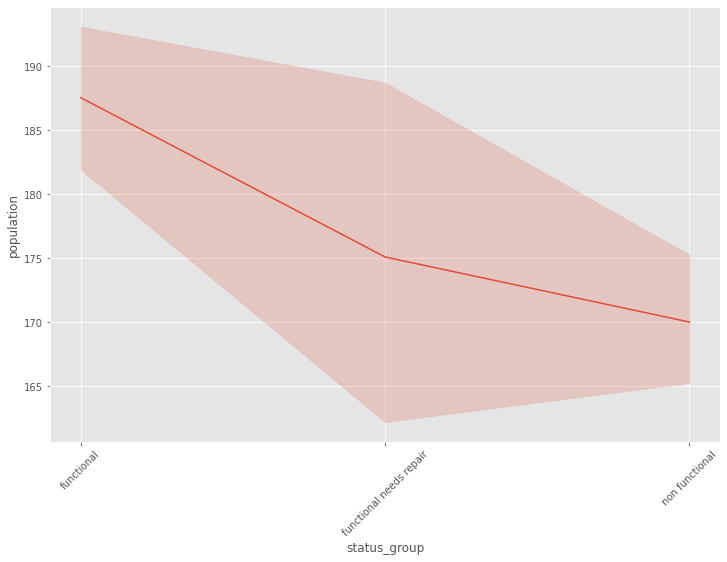

In [104]:
k1 = sns.lineplot(wps.status_group, wps.population)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

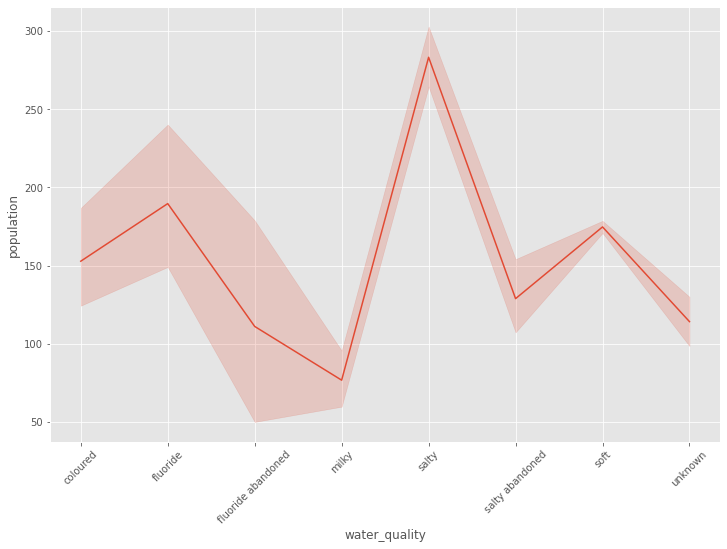

In [105]:
k2 = sns.lineplot(wps.water_quality, wps.population)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

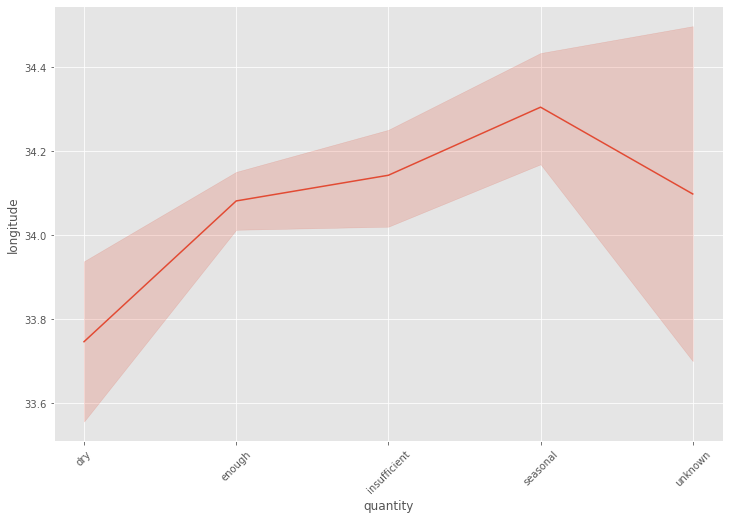

In [144]:
k3 = sns.lineplot(wps.quantity, wps.longitude)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

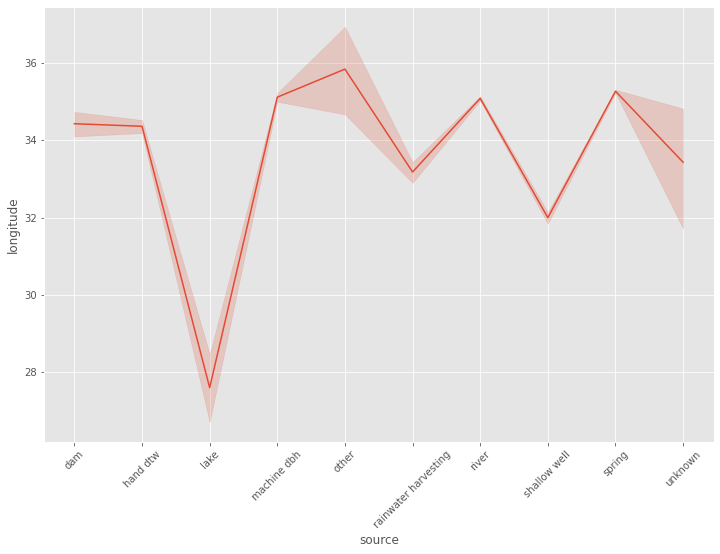

In [145]:
k4 = sns.lineplot(wps.source, wps.longitude)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

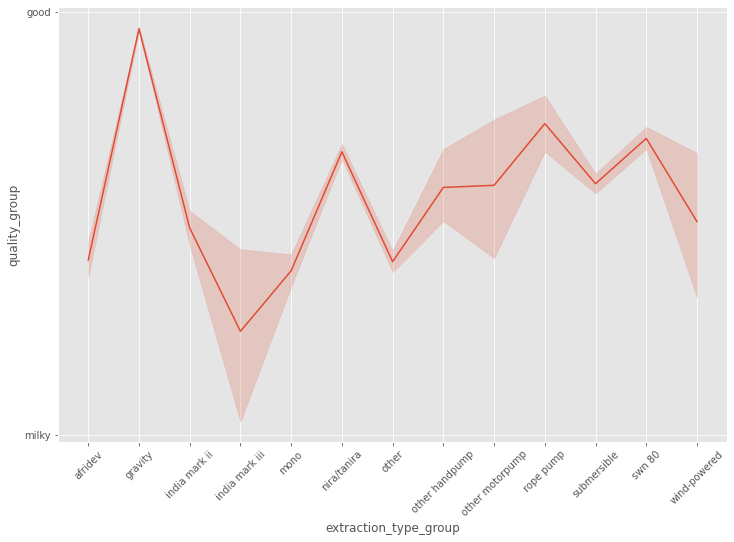

In [108]:
k6 = sns.lineplot(wps.extraction_type_group, wps.quality_group)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'spring'),
  Text(1, 0, 'rainwater harvesting'),
  Text(2, 0, 'dam'),
  Text(3, 0, 'other'),
  Text(4, 0, 'shallow well'),
  Text(5, 0, 'borehole'),
  Text(6, 0, 'river/lake')])

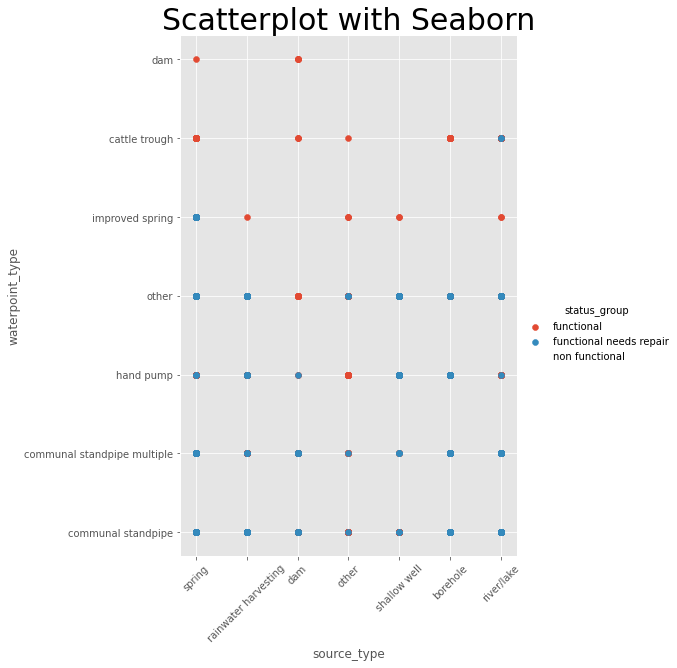

In [169]:
sns.FacetGrid(data=wps[-(wps.status_group == 'non functional')], hue = 'status_group', size = 8).map(plt.scatter, 'source_type', 'waterpoint_type').add_legend() 
plt.title("Scatterplot with Seaborn", fontsize=30)
plt.xticks(rotation=45)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000')])

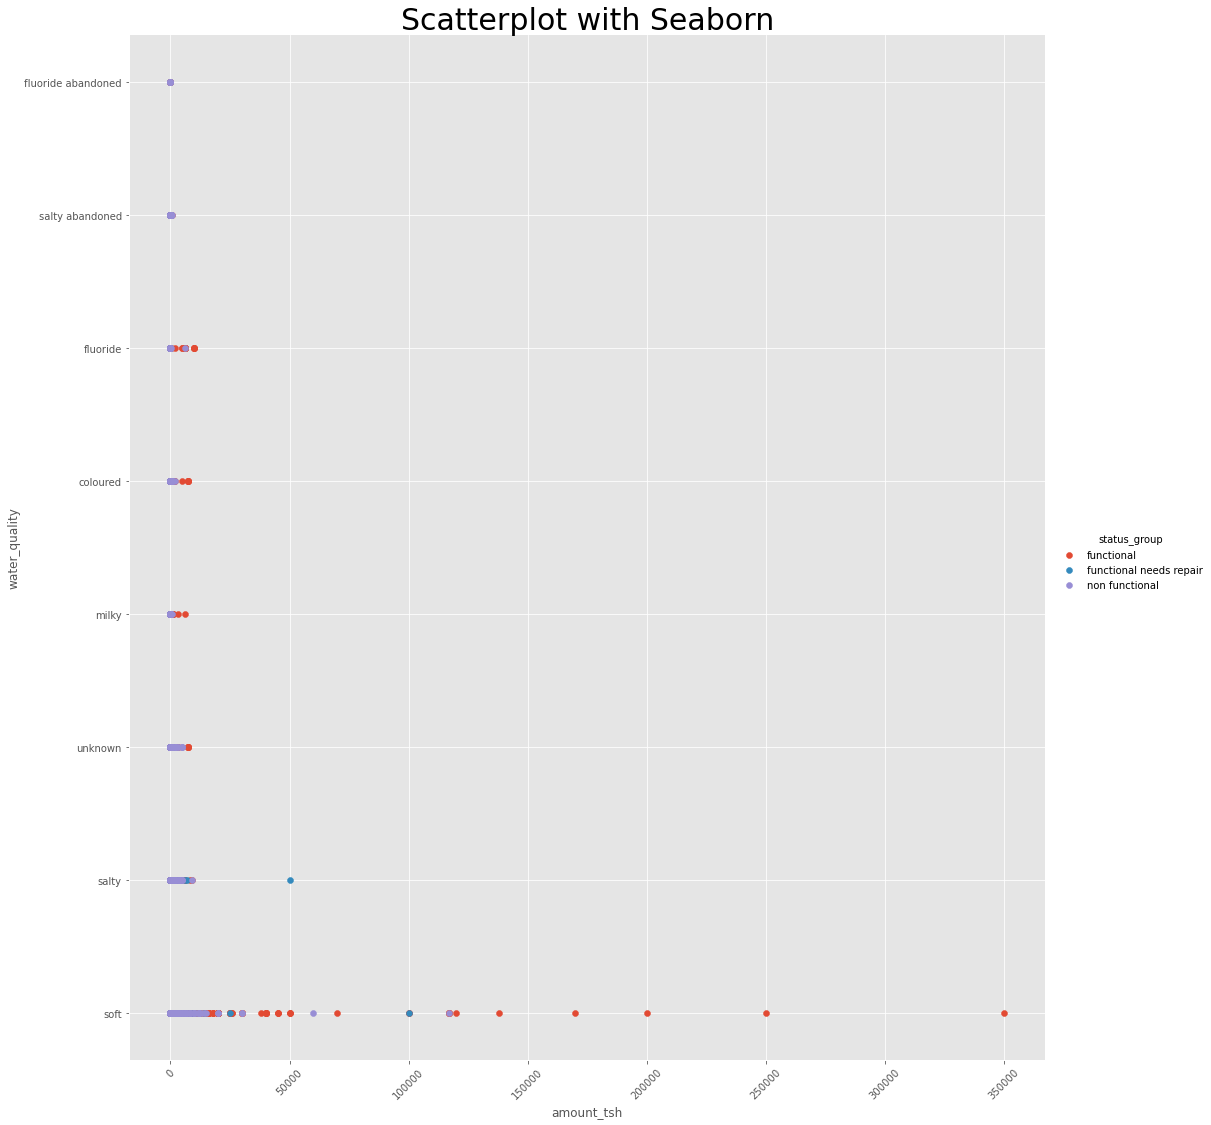

In [137]:
sns.FacetGrid(wps, hue ='status_group', size = 15).map(plt.scatter, 'amount_tsh', 'water_quality').add_legend() 
plt.title("Scatterplot with Seaborn", fontsize=30)
plt.xticks(rotation=45)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000')])

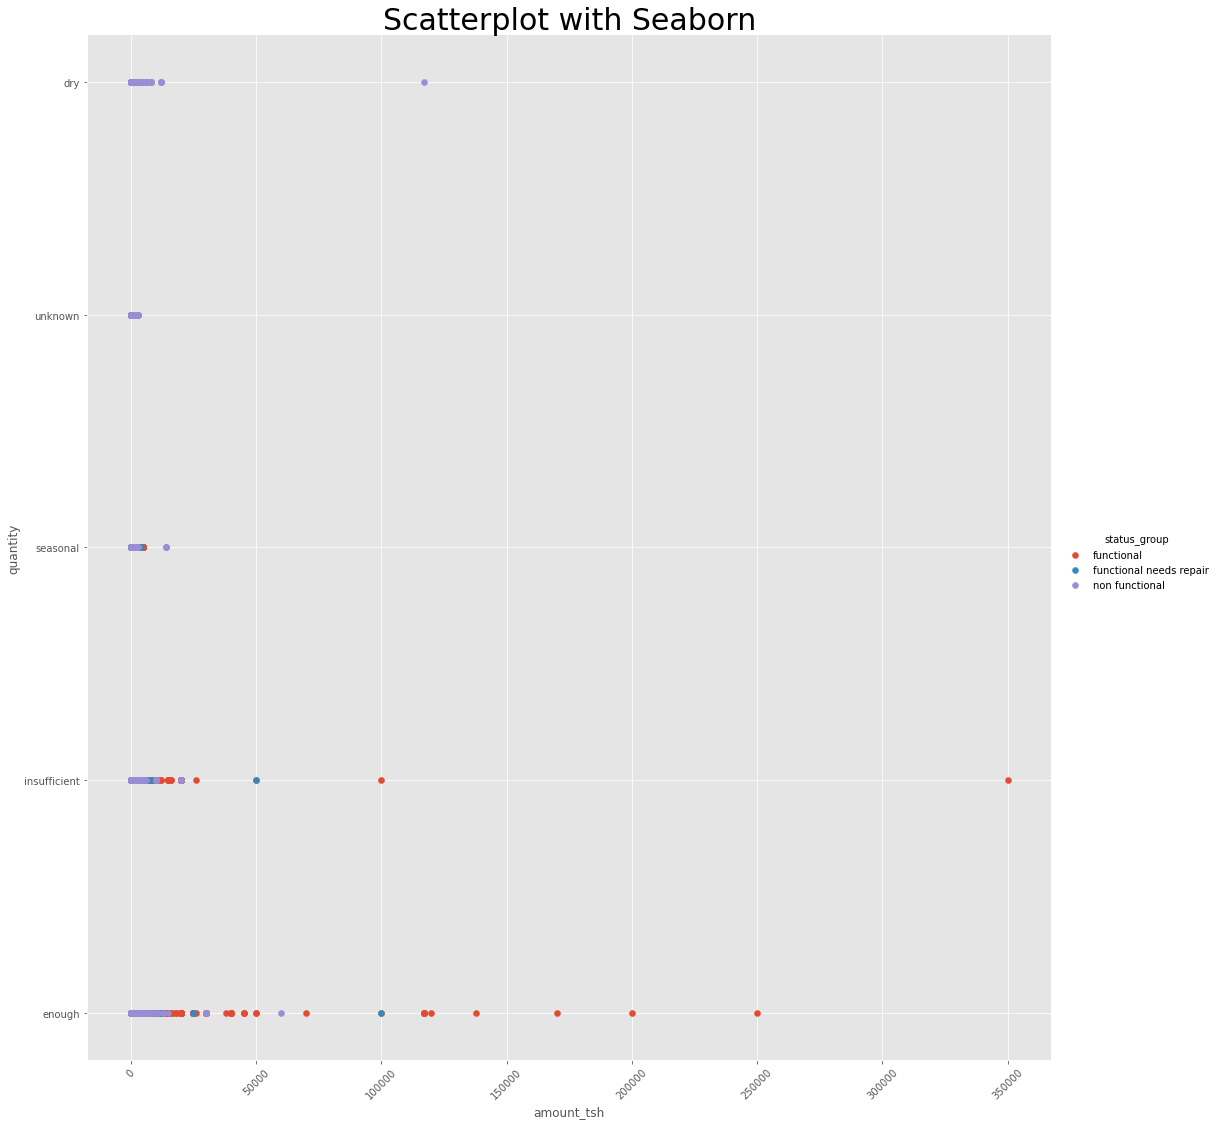

In [136]:
sns.FacetGrid(wps, hue ='status_group', size = 15).map(plt.scatter, 'amount_tsh', 'quantity').add_legend() 
plt.title("Scatterplot with Seaborn", fontsize=30)
plt.xticks(rotation=45)

In [161]:
sns.FacetGrid(data = wps[-(wps.status_group == 'non_functional')], hue ='status_group' size = 5).map(plt.scatter, 'quantity', 'water_quality').add_legend() 
plt.title("Scatterplot with Seaborn", fontsize=15)
plt.xticks(rotation=45)

SyntaxError: invalid syntax (<ipython-input-161-20bcd407b0b4>, line 1)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000')])

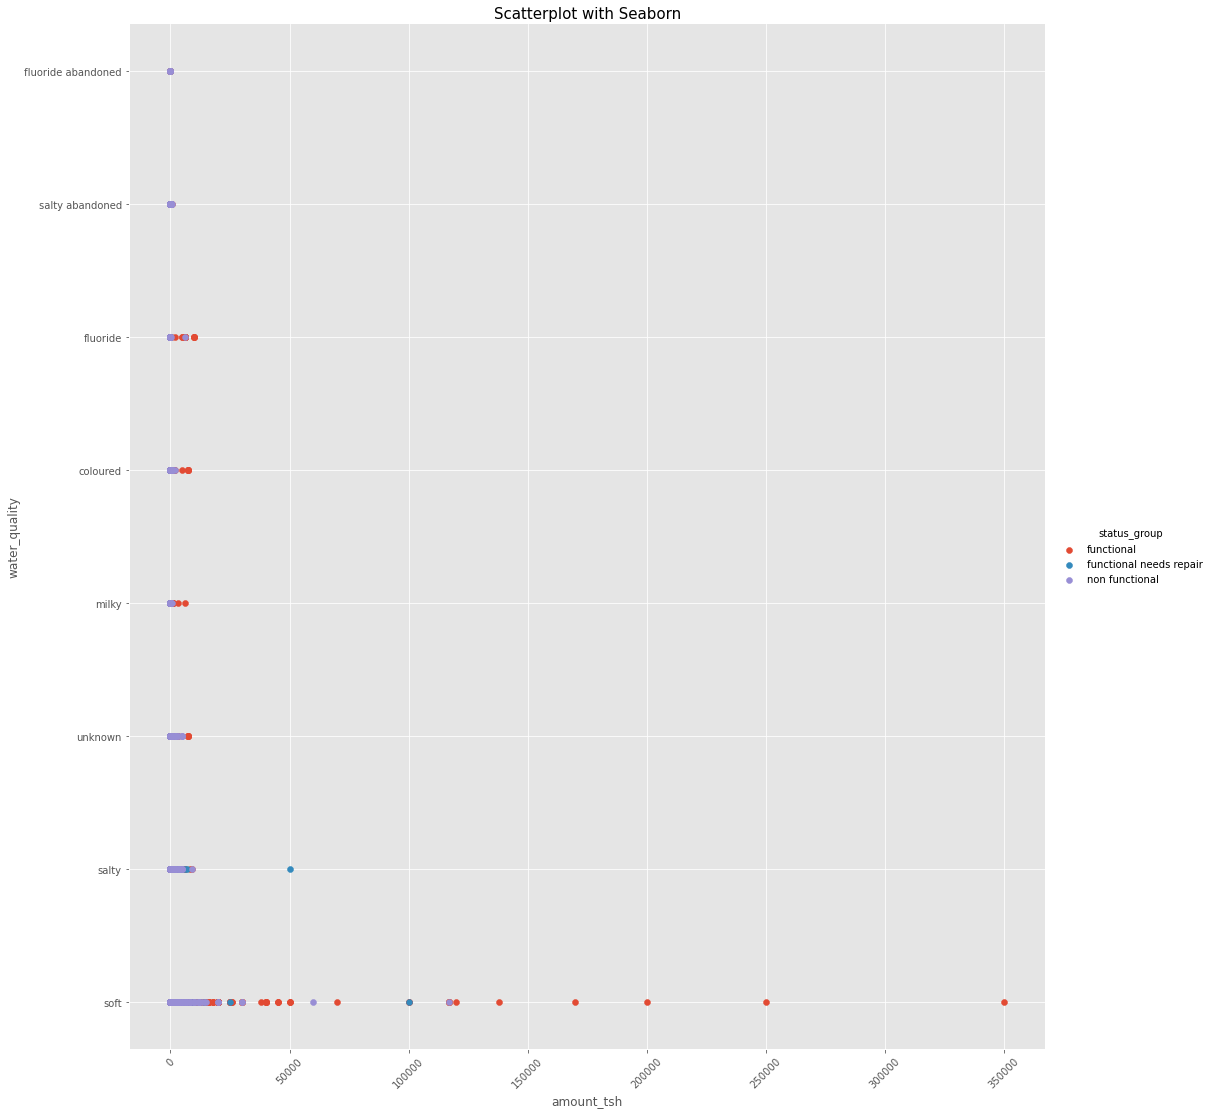

In [113]:
sns.FacetGrid(wps, hue ='status_group', size = 15).map(plt.scatter, 'amount_tsh', 'water_quality').add_legend() 
plt.title("Scatterplot with Seaborn", fontsize=15)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'soft'),
  Text(1, 0, 'salty'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'milky'),
  Text(4, 0, 'coloured'),
  Text(5, 0, 'fluoride'),
  Text(6, 0, 'salty abandoned'),
  Text(7, 0, 'fluoride abandoned')])

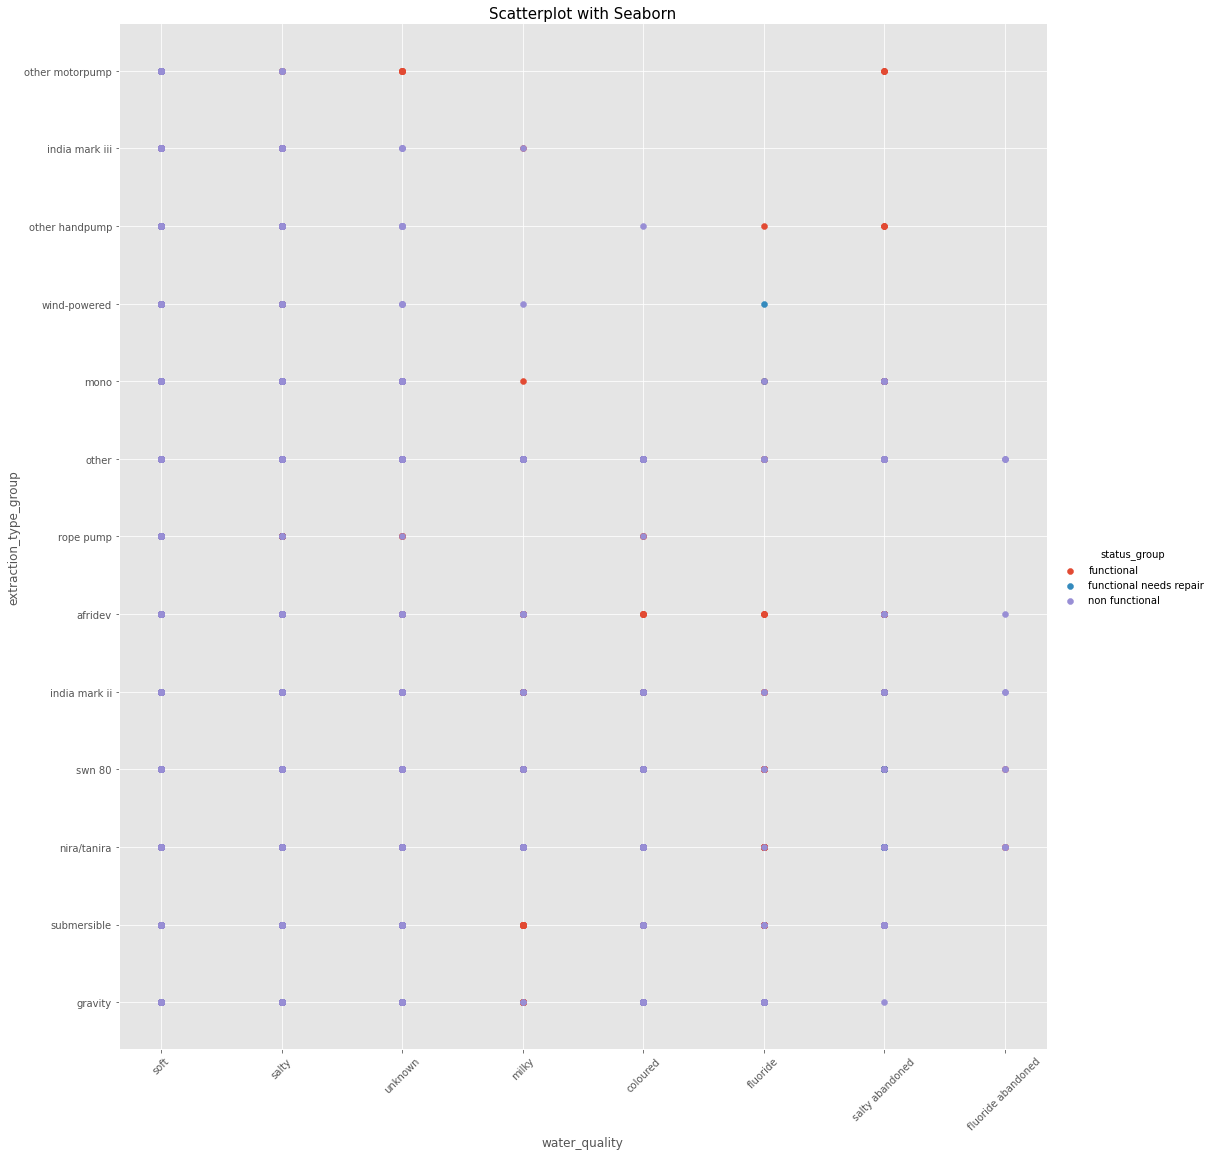

In [114]:
sns.FacetGrid(wps, hue = 'status_group', size = 15).map(plt.scatter, 'water_quality', 'extraction_type_group').add_legend() 
plt.title("Scatterplot with Seaborn", fontsize=15)
plt.xticks(rotation=45)

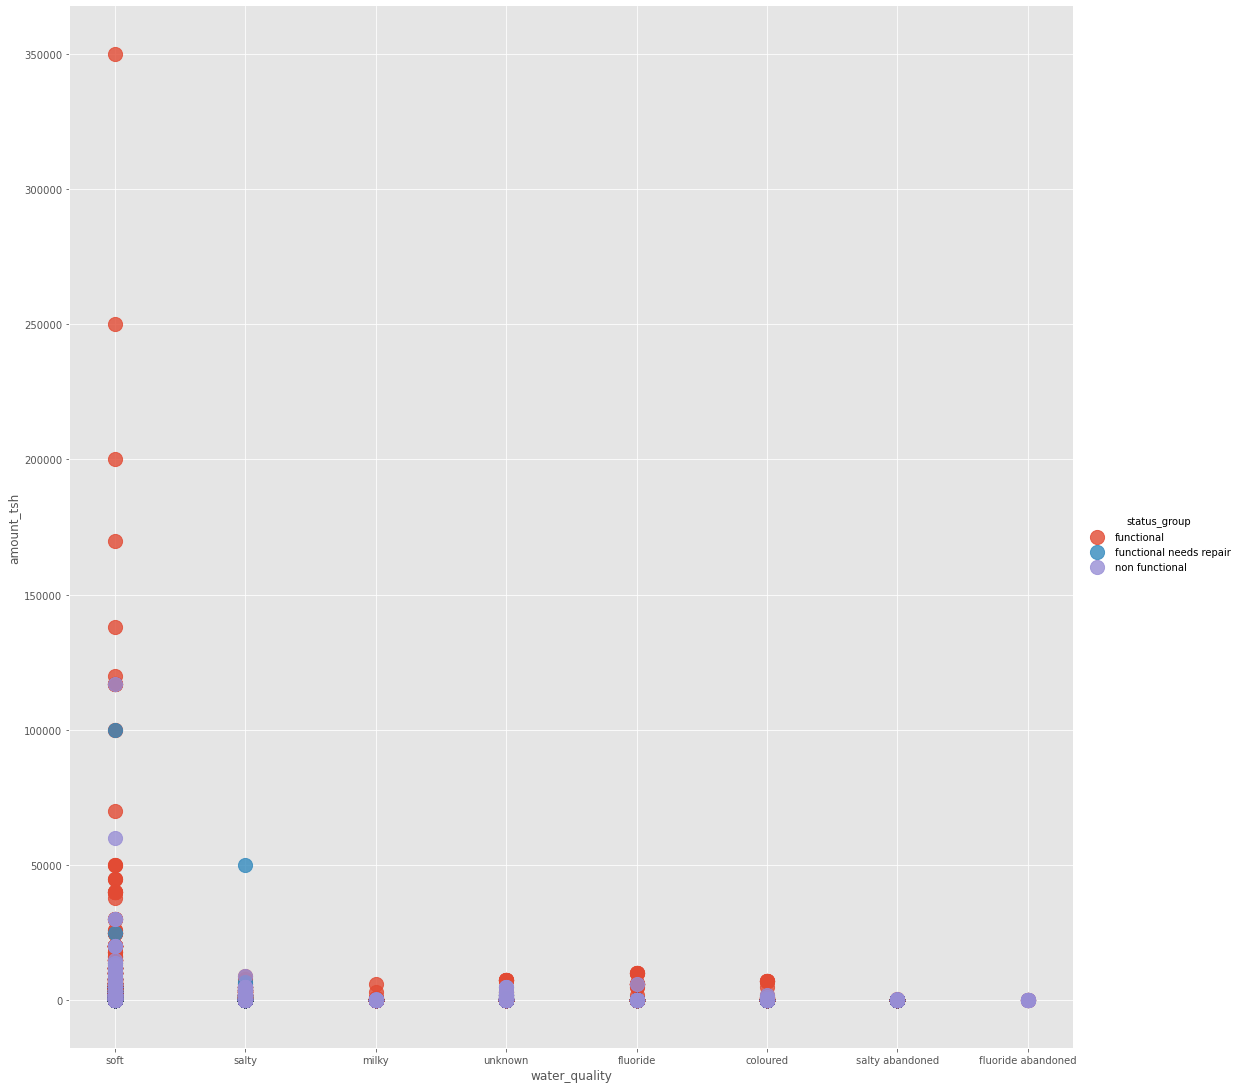

In [115]:
k7 = sns.lmplot(data=wps, x='water_quality', y= 'amount_tsh', fit_reg=False, hue ="status_group" , size = 15, aspect = 1, scatter_kws={"s":200})

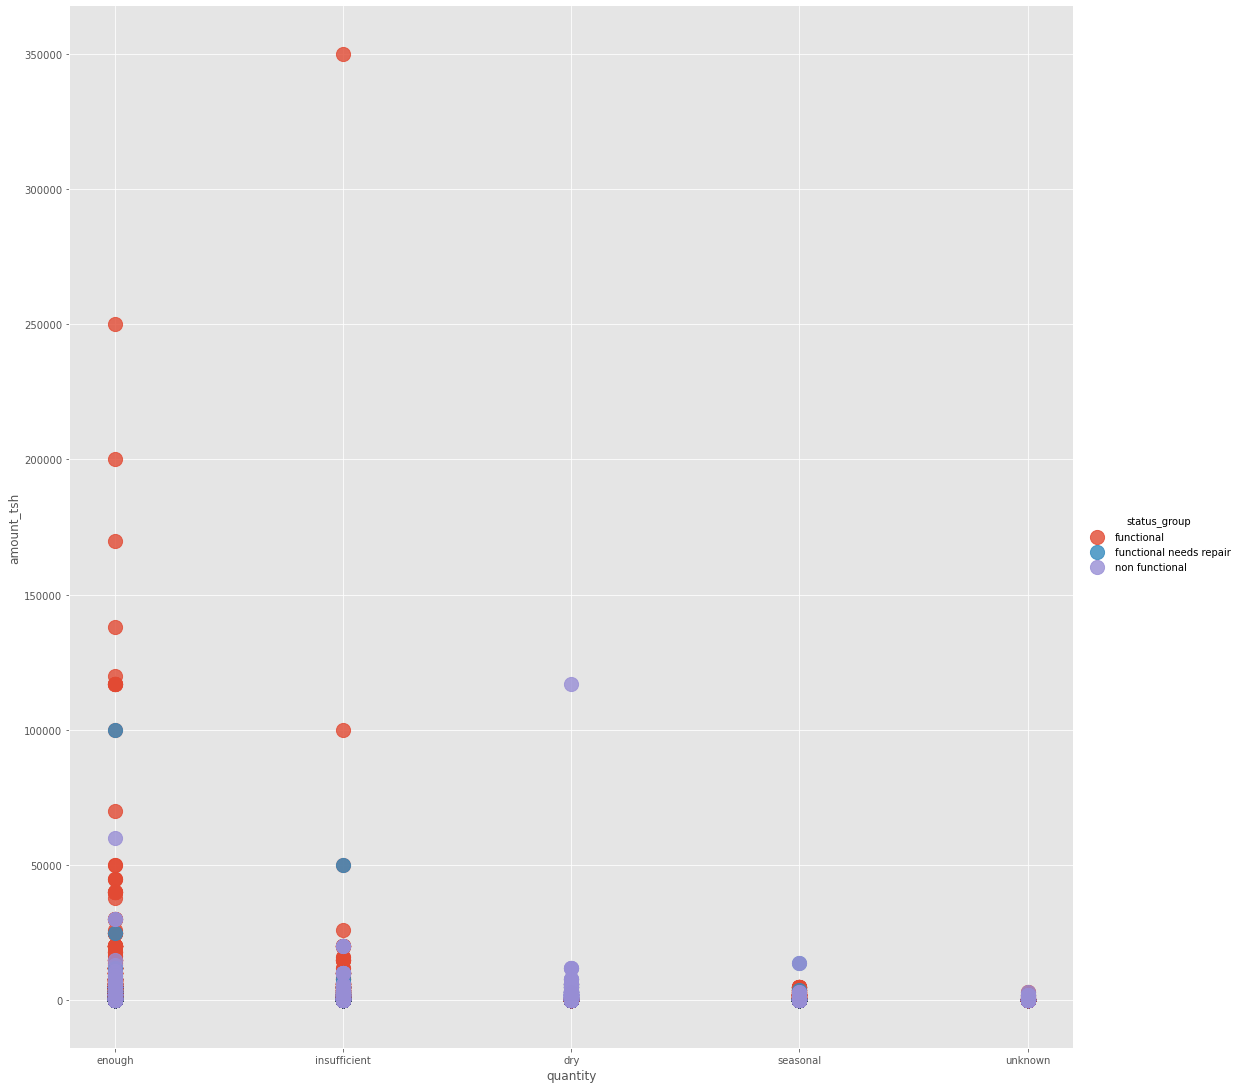

In [116]:
k8 = sns.lmplot(data=wps, x='quantity', y= 'amount_tsh', fit_reg=False, hue ="status_group" , size = 15, aspect = 1, scatter_kws={"s":200})

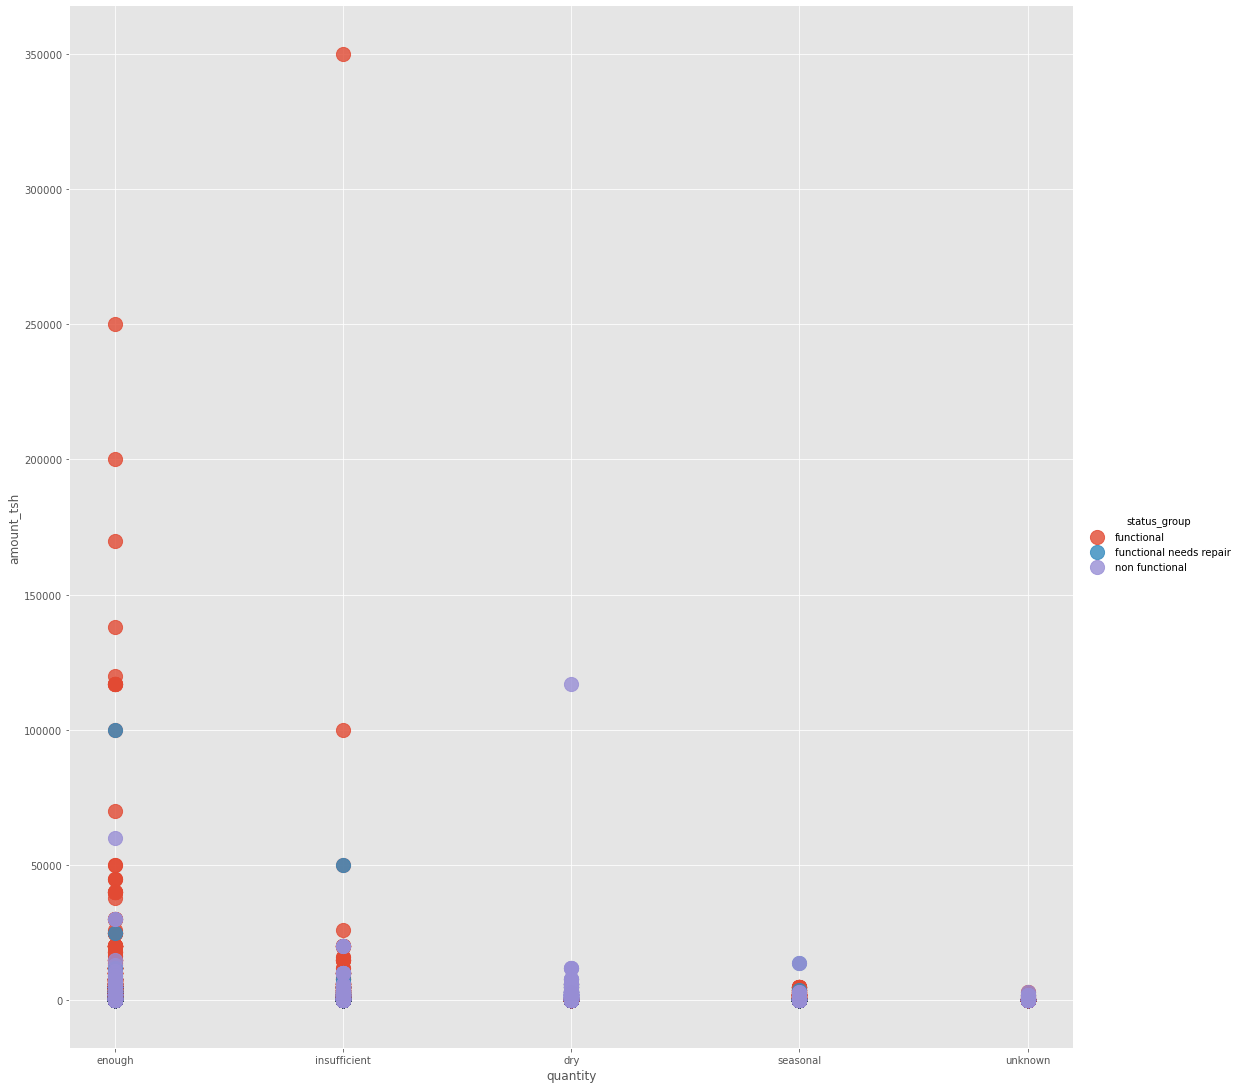

In [117]:
k8 = sns.lmplot(data=wps, x='quantity', y= 'amount_tsh', fit_reg=False, hue ="status_group" , size = 15, aspect = 1, scatter_kws={"s":200})

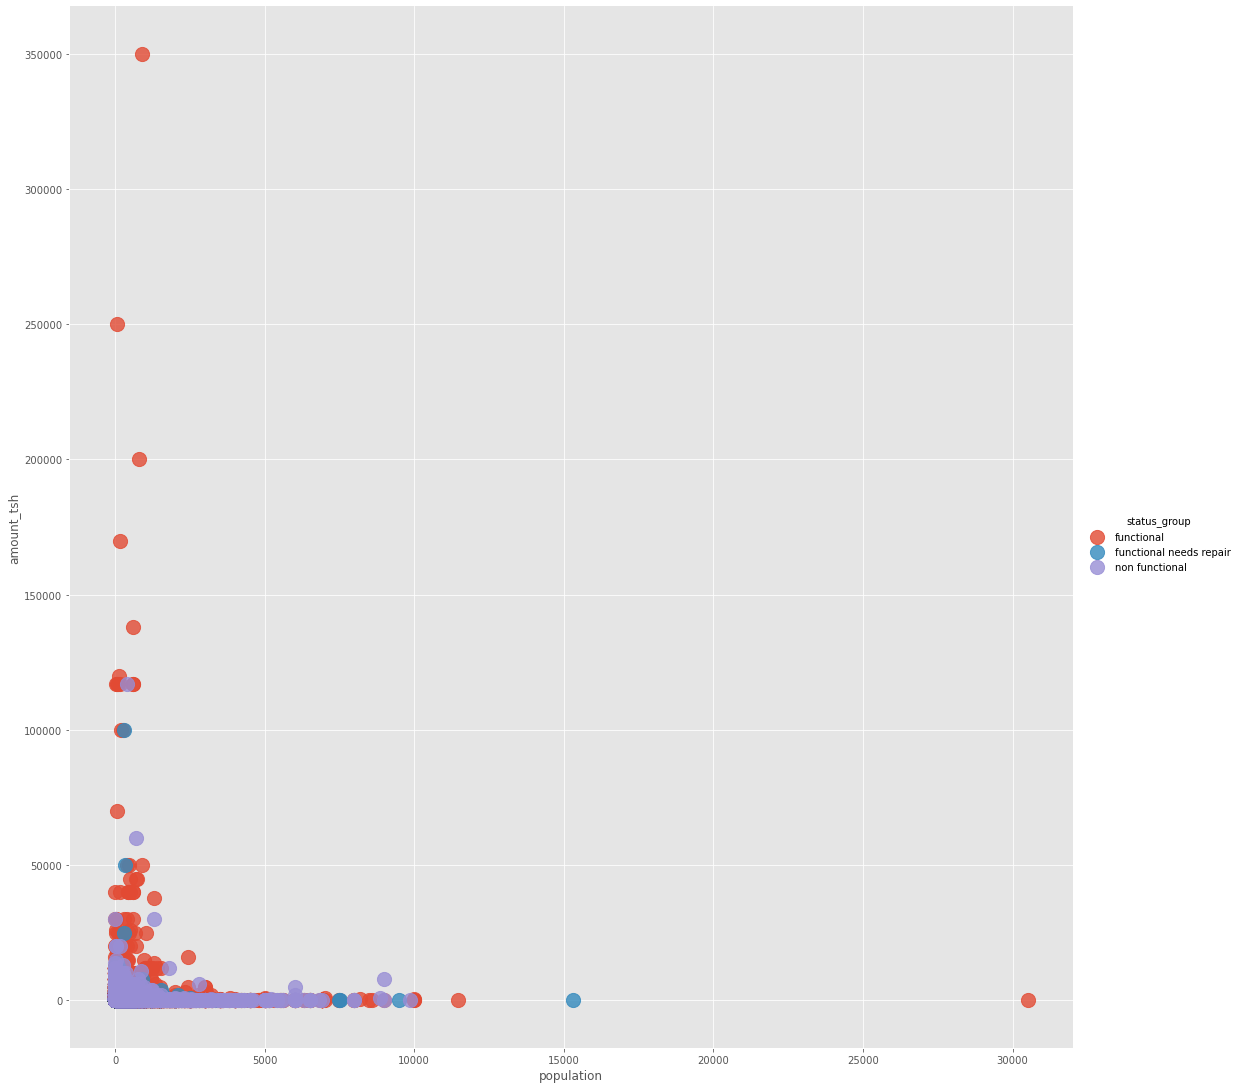

In [118]:
k9 = sns.lmplot(data=wps, x='population', y= 'amount_tsh', fit_reg=False, hue ="status_group" , size = 15, aspect = 1, scatter_kws={"s":200})

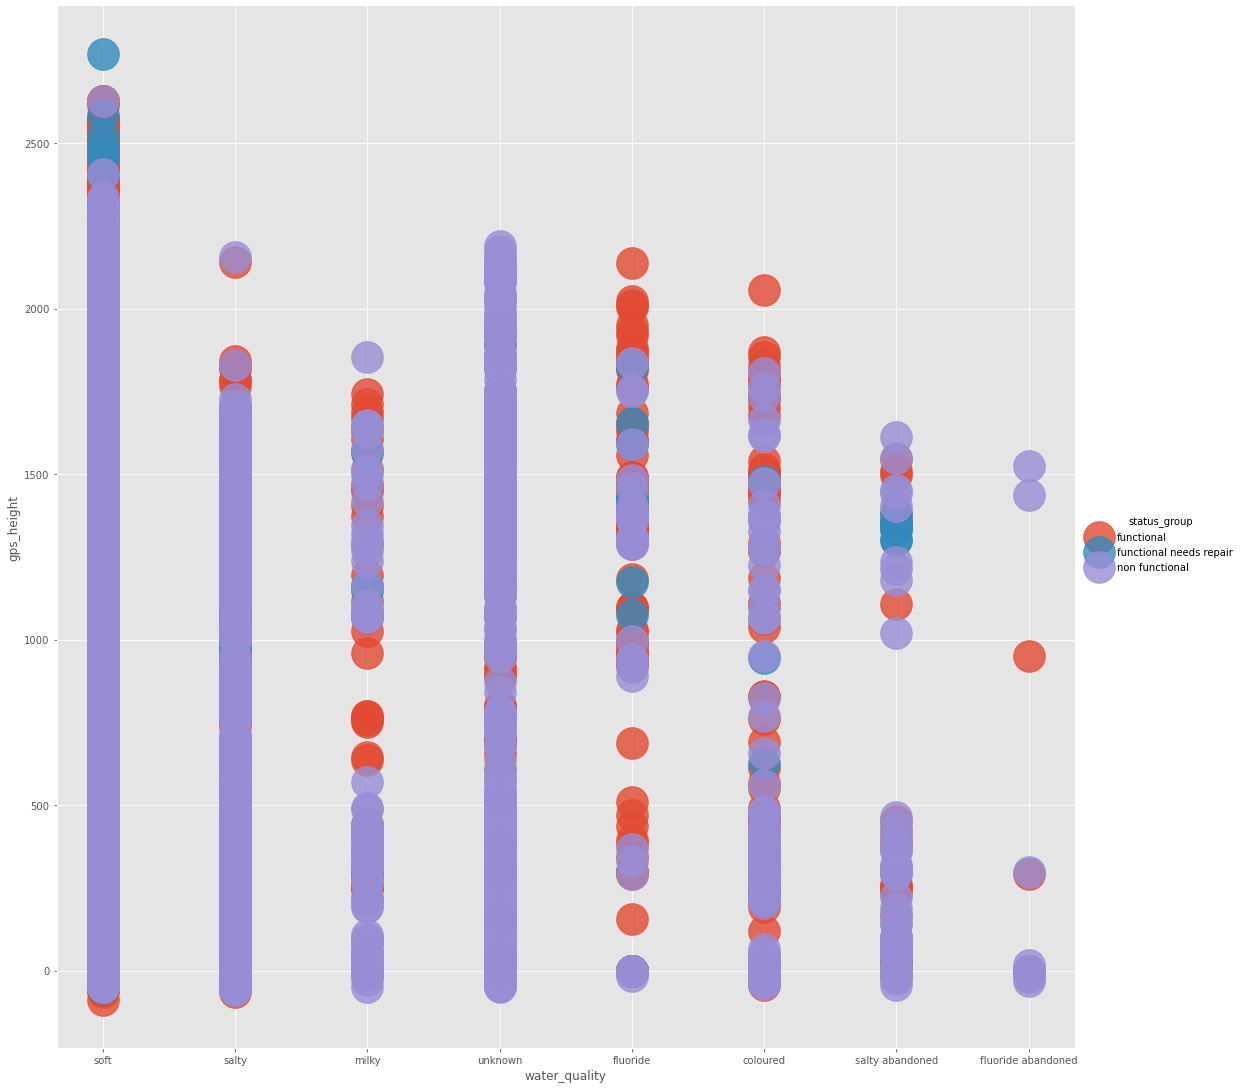

In [119]:
k8 = sns.lmplot(data=wps, x='water_quality', y= 'gps_height', fit_reg=False, hue ="status_group" , size = 15, aspect = 1, scatter_kws={"s":1000})

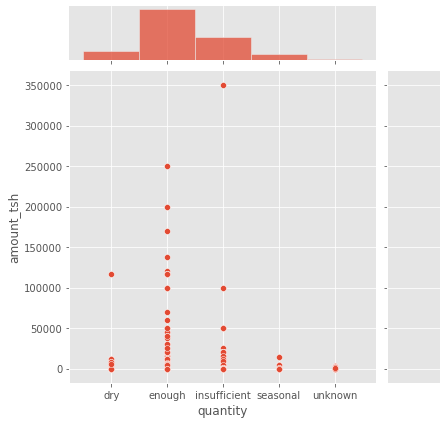

In [120]:
sns.jointplot(data=wps, x='quantity',y='amount_tsh')

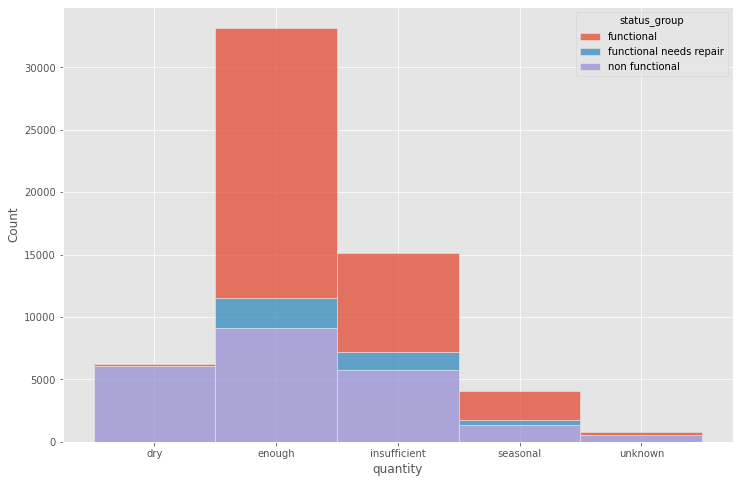

In [121]:
k10 = sns.histplot(data=wps, x='quantity', hue = 'status_group', multiple='stack')

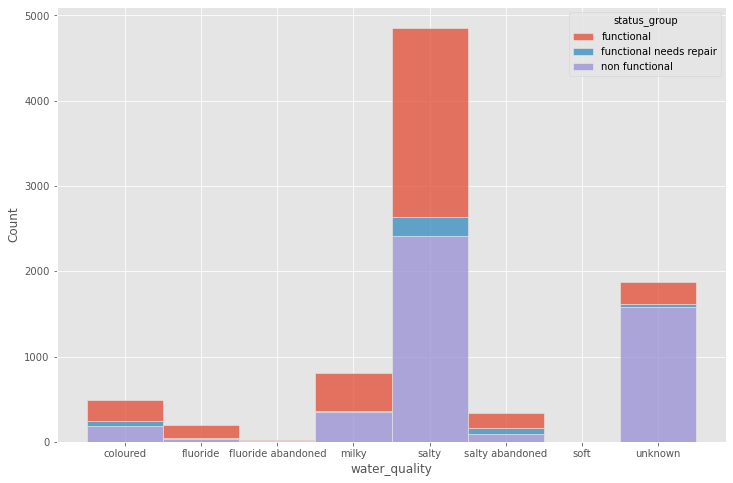

In [159]:
k10 = sns.histplot(data=wps[-(wps.water_quality == 'soft')], x='water_quality', hue = 'status_group', multiple='stack')

In [123]:
replace_values = {'functional':2, 'functional needs repair':1, 'non functional':0}
wps['status_values'] = wps.status_group.replace(replace_values)

piv_wps = wps[['basin', 'status_group', 'status_values']]
piv_table = piv_wps.pivot_table(index='basin', columns='status_group', aggfunc='count')
piv_table

status_values                                       
status_group               functional functional needs repair non functional
basin                                                                       
Internal                         4482                     557           2746
Lake Nyasa                       3324                     250           1511
Lake Rukwa                       1000                     270           1184
Lake Tanganyika                  3107                     742           2583
Lake Victoria                    5100                     989           4159
Pangani                          5372                     477           3091
Rufiji                           5068                     437           2471
Ruvuma / Southern Coast          1670                     326           2497
Wami / Ruvu                      3136                     269           2582

In [124]:
piv_table = pd.pivot_table(wps,index=['funder', 'status_group'],values='status_values', aggfunc='count')
piv_table

piv_df= wps[['funder','status_group','status_values']]
piv_table = piv_df.pivot_table(index='funder', columns='status_group', aggfunc='count')
piv_table

status_values                                       
status_group           functional functional needs repair non functional
funder                                                                  
0                             445                       3            329
A/co Germany                    7                       1              7
Aar                            22                       4              7
Abas Ka                         1                       0              0
Abasia                         36                       2              5
...                           ...                     ...            ...
Zao                             0                       0              1
Zao Water Spring                3                       0              0
Zao Water Spring X              0                       0              1
Zinduka                         1                       0              0
Zingibali Secondary             1                       0              0

[1897 rows x 3 columns]

<AxesSubplot:xlabel='None-status_group', ylabel='funder'>

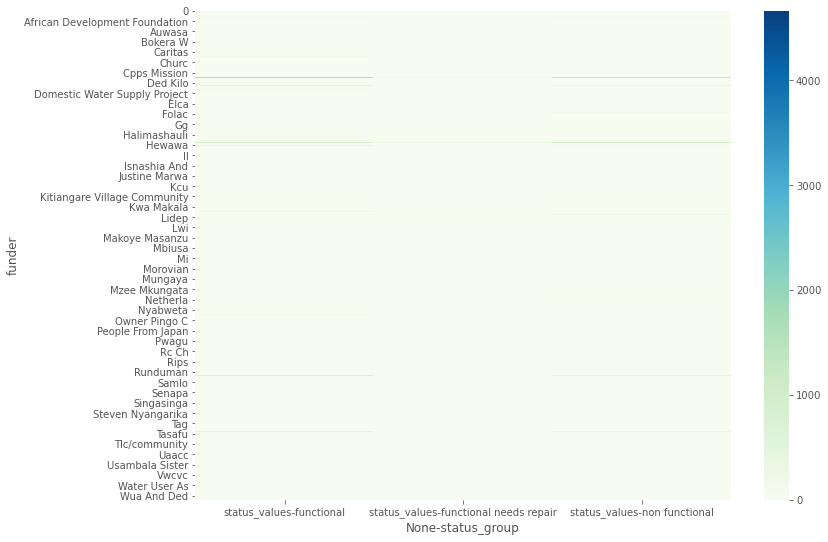

In [125]:
from matplotlib import pyplot
a4_dims = (12, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(piv_table, cmap='GnBu')

In [126]:
wps.installer.value_counts().head(10)

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: installer, dtype: int64

In [127]:
def installer_cl(row):
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    elif row['installer']=='KKKT':
        return 'kkkt'
    elif row['installer']=='Hesawa':
        return 'hesawa'
    elif row['installer']=='TCRS':
        return 'tcrs'
    elif row['installer']=='Central government':
        return 'Central government'
    else:
        return 'other'  
wps['installer'] = wps.apply(lambda row: installer_cl(row), axis=1)

In [128]:
def funder_cl(row):  
    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    elif row['funder']=='Kkkt':
        return 'Kkkt'
    elif row['funder']=='World Vision':
        return 'World Vision'
    elif row['funder']=='Unicef':
        return 'Unicef'
    elif row['funder']=='Tasaf':
        return 'Tasaf'
    elif row['funder']=='District Council':
        return 'District Council'
    else:
        return 'other'
wps['funder'] = wps.apply(lambda row: funder_cl(row), axis=1)

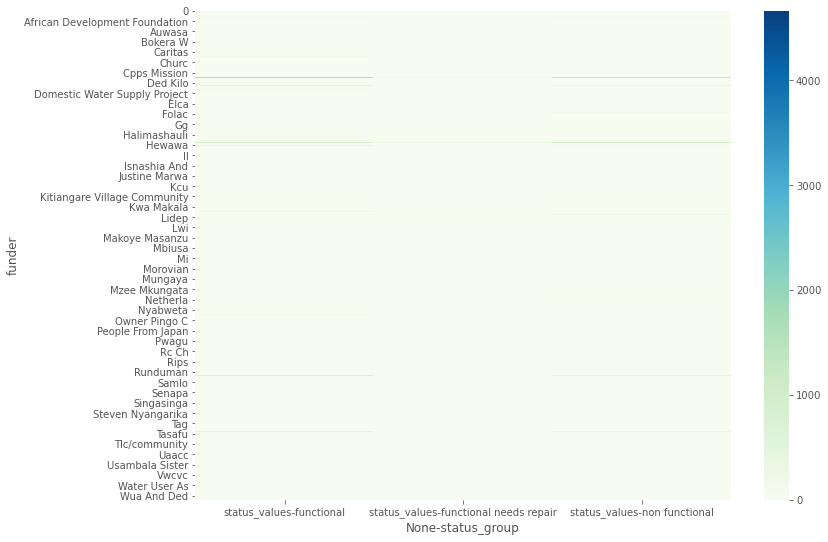

In [129]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(piv_table, cmap='GnBu')

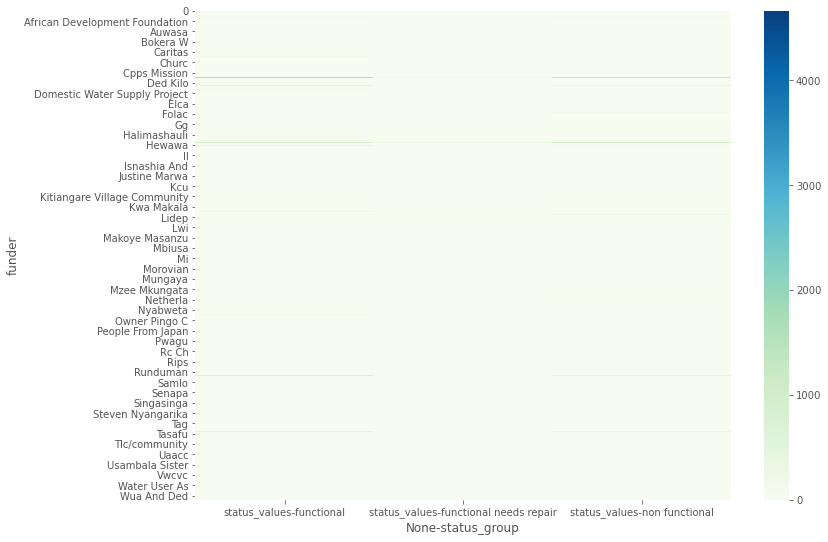

In [130]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(piv_table, cmap='GnBu')

In [131]:
wps.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [132]:
##lets check the data types again.
cols = wps.select_dtypes(include = ['object'])
cols.apply(lambda x: len(x.unique()))

funder                  11
installer               10
wpt_name             37400
basin                    9
subvillage           19288
region                  21
lga                    125
ward                  2092
public_meeting           3
recorded_by              1
scheme_management       13
scheme_name           2697
dtype: int64

In [133]:
wps.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [134]:
wps.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [135]:
wps.to_csv('wps.csv', index=True)
wps.shape

(59400, 42)